[View in Colaboratory](https://colab.research.google.com/github/victwise/fastai_numerical_linear_algebra/blob/master/Cap%C3%ADtulo_1.ipynb)

Resource main:


*   http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/1.%20Why%20are%20we%20here.ipynb#Matrix-and-Tensor-Products



# Producto Matriz-Vector | Markov Chain

In [0]:
#imports
import numpy as np



In [0]:
# Matriz de Markov
def matriz_estocastica(z):
  Matrix = np.array([[0.9,0.07,0.02,0.01],[0.0,0.93,0.05,0.02],[0.0,0.0,0.85,0.15],[0.0,0.0,0.0,1.0]])
  #Validacion para normalizar a 1 la suma de de mis filas, para que sea un vector estocastico
  Matrix = Matrix/(1+z)
  
  return Matrix 
  

In [0]:
# estado actual
salud_actual = np.array ([0.85,0.10,0.05,0.0])

In [0]:
# n es el número de iteraciones de la matriz, es decir cuantas veces se desplaza en el tiempo "t"
# z es la variable de influencia de un estado con otro, por ejemplo que un sintoma hay un 0.05 de probabilidades más que lleve a la muerte,según este caso.
def matriz_futura(n, z):
    
    # La función np.dot multiplica el vector de inicio, salud_actual, con la enésima potencia de la Matriz de Markov.
    
    return np.dot(salud_actual, np.linalg.matrix_power(matriz_estocastica(z),n))


In [0]:
matriz_futura(1,0)

array([0.765 , 0.1525, 0.0645, 0.018 ])

Recursos:


*   https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial



# Producto Matriz-Matriz

In [0]:
#import numpy
import numpy as np

In [0]:
demanded_q = np.array([
    [6,5,3,1],
    [3,6,2,2],
    [3,4,3,1]
])

In [0]:
prices = np.array([
    [1.5,1],
    [2,2.5],
    [5,4.5],
    [16,17]
])

In [0]:
result = demanded_q.dot(prices)

In [5]:
result

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

# Datos en un Imagen


In [0]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [0]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [0]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [45]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [46]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [47]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [0]:
images = images/255

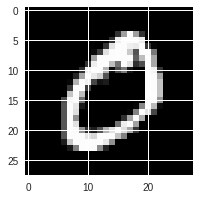

In [49]:
plot(images[0])

In [50]:
labels[0]

0

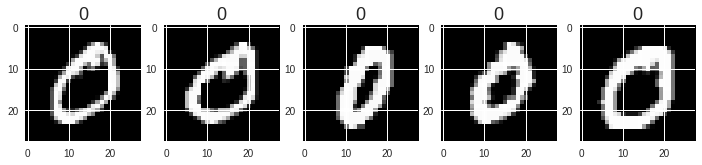

In [51]:
plots(images[:5], titles=labels[:5])

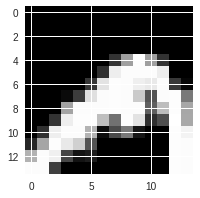

In [52]:
plot(images[0,0:14, 8:22])

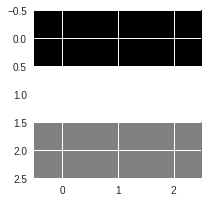

In [53]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [54]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1882, 0.9333, 0.9882, 0.9882],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.149 , 0.6471, 0.9922, 0.9137, 0.8157],
       [0.    , 0.    , 0.    , 0.    , 0.0275, 0.698 , 0.9882, 0.9412, 0.2784, 0.0745],
       [0.    , 0.    , 0.    , 0.    , 0.2235, 0.9882, 0.9882, 0.2471, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.7765, 0.9922, 0.7451, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.298 , 0.9647, 0.9882, 0.4392, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.902 , 0.098 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.8745, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.5686, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3373, 0.9922, 0.8824, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.9765, 0.5725, 0.1882, 0.1137, 0.3333],
       [0.    , 0.   

In [0]:
corrtop = correlate(images[0], top)

In [56]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9216,  0.9765,  0.7843, -0.2392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.149 ,  0.6078,  0.6667,  0.4431, -0.1882, -0.6196],
       [ 0.    ,  0.    ,  0.    ,  0.0275,  0.5765,  0.9176,  0.8392, -0.3451, -1.4275, -1.5961],
       [ 0.    ,  0.    ,  0.    ,  0.1961,  0.4863,  0.4863, -0.4039, -0.9725, -1.0471, -0.4627],
       [ 0.    ,  0.    ,  0.    ,  0.5529,  0.5569,  0.3137, -0.4863, -0.4902, -0.2471,  0.    ],
       [ 0.    ,  0.    ,  0.298 ,  0.4863,  0.4824, -0.1216, -0.3098, -0.3059,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0353,  0.0588, -0.0275, -0.4039, -0.4275, -0.3412,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.0275, -0.1255, -0.1255, -0.098 ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.3059, -0.3059, -0.3059,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0039,  0.0078,  0.3216,  0.3176,  0.3137,  0.    ,  0.    ,  0.    ],
       [ 0

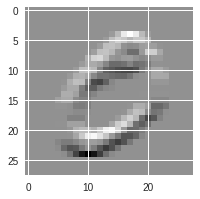

In [57]:
plot(corrtop)

In [58]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

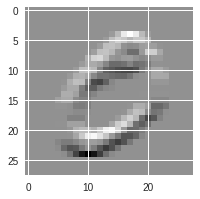

In [59]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

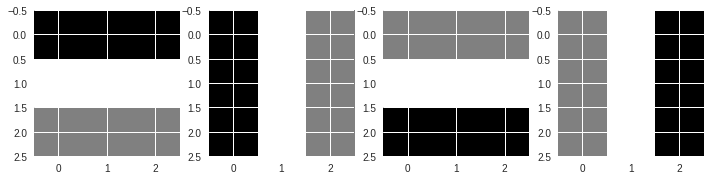

In [60]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

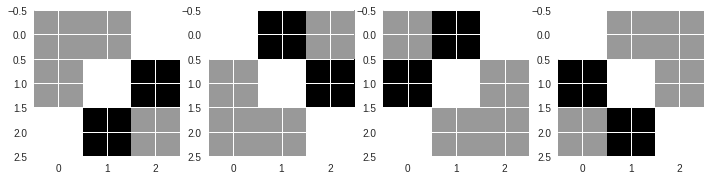

In [61]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

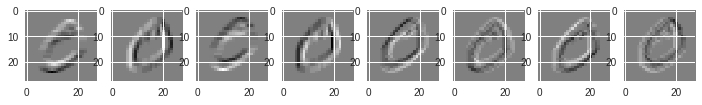

In [62]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [0]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

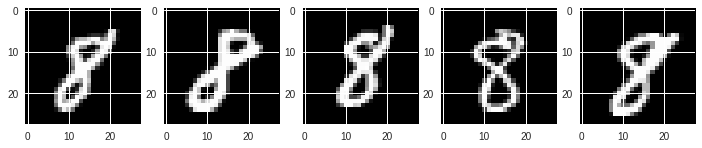

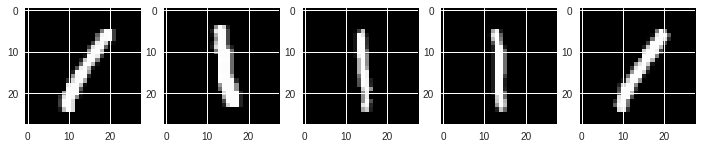

In [64]:
plots(eights[:5])
plots(ones[:5])

# Artimética de Punto Flotante

In [0]:
def f(x):
    if x <= 1/2:
        return 2 * x
    if x > 1/2:
        return 2*x - 1

In [2]:
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# Cóndicional y Estabilidad


In [4]:
import numpy as np
import scipy.linalg as la 

A = np.array([[1., 1000], [0, 1]])
B = np.array([[1, 1000], [0.001, 1]])

print(A)

print(B)

[[   1. 1000.]
 [   0.    1.]]
[[1.e+00 1.e+03]
 [1.e-03 1.e+00]]


In [0]:
np.set_printoptions(suppress=True, precision=4)

In [6]:
wA, vrA = la.eig(A)
wB, vrB = la.eig(B)

wA, wB

(array([1.+0.j, 1.+0.j]), array([2.+0.j, 0.+0.j]))



*   La diferencia entre un número X y un punto flotante aproximado F(X) es siempre más pequeño que el Machine Epsilon(Es la mitad de la distancia entre 1 y el siguiente número más grande. ) en términos relativos.
*   Cada operador mátematico + - / * , de un punto flotante artimetico es exactamente relativo al tamaño del error del Machine Epsilon.

